In [1]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [30]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.neighbors import KNeighborsClassifier

In [10]:
best = (0,0,0)
for k in range(2, 10):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors= k, p = p)
        scores = cross_val_score(knn_clf, X_train, y_train, cv = 3)
        s = np.mean(scores)
        if s > best[0]:
            best = (s, k ,p)
best

(0.9836204611490317, 2, 2)

In [8]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.99116998, 0.97327394, 0.96629213])

In [11]:
best = (0,0,0)
for k in range(2, 10):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors= k, p = p)
        knn_clf.fit(X_train,y_train)
        s = knn_clf.score(X_test, y_test)
        if s > best[0]:
            best = (s, k ,p)
best

(0.9866666666666667, 7, 3)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(2,11)],
        'p':[i for i in range(1,6)]
    },
        {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(2,11)],
    }
]
grid = GridSearchCV(knn_clf,param_grid, verbose = 1, n_jobs= -1)
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   38.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=5,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}, {'weights': ['uniform'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
grid.best_score_

0.9836674090571641

In [22]:
grid.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [23]:
best_knn_clf = grid.best_estimator_

In [24]:
best_knn_clf.score(X_test,y_test)

0.98

In [33]:
from sklearn.pipeline import Pipeline

In [39]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

# Ridge

In [37]:
from sklearn.linear_model import Ridge
def ridge_regression(degree, alpha):
    return Pipeline([

    ("poly", PolynomialFeatures(degree = degree)),
    ("standard_scaler", StandardScaler()),
    ("lin_reg",Ridge(alpha))
])

In [41]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    plt.scatter(x, y)
    plt.plot(X_plot[:,0],y_plot,color = "r")
    plt.axis([-3,3,0,6])
    plt.show()


In [42]:
x = np.random.uniform(-3,3,size = 100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 +np.random.normal(0,1,100)

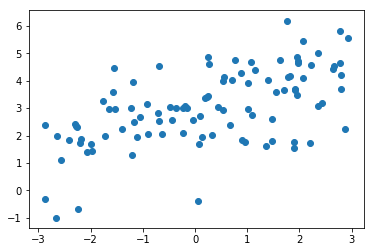

In [43]:
plt.scatter(x,y)
plt.show()

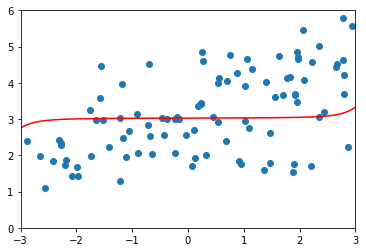

In [54]:
ridge1_reg = ridge_regression(20, 10000)
ridge1_reg.fit(X, y)
plot_model(ridge1_reg)

# LASSO

In [62]:
from sklearn.linear_model import Lasso
def lasso_regression(degree, alpha):
    return Pipeline([
    ("poly", PolynomialFeatures(degree = degree)),
    ("standard_scaler", StandardScaler()),
    ("lin_reg",Lasso(alpha))
])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


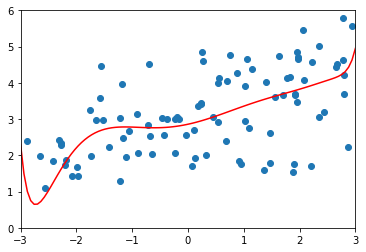

In [63]:
lasso_reg = lasso_regression(20, 0.0001)
lasso_reg.fit(X, y)
plot_model(lasso_reg)